In [ ]:
import matplotlib.pyplot as plt
import os
pltx = 16
plty = 9

# 处理Tabu数据

In [ ]:
sourcefolder = "../resultTabu3.0/"
filelist = []
for root, dirs, files in os.walk(sourcefolder):  
    filelist = sorted(files)
print(filelist)

### 时间数据、cost数据、conflict数据

In [ ]:
tabu_cost_init = []
tabu_cost_final = []
tabu_conflict_init = []
tabu_conflict_final = []
tabu_timespan = []
tabu_x = []

In [ ]:
def readresult(filename):
    with open(filename) as f:
        lines = f.readlines()
        processTime = float(lines[0].split(" ")[2])
        dataraw = lines[2].split(" ")
        data = []
        for i in dataraw:
            data.append(float(i))
    f.close()
    return (processTime, data)

In [ ]:

for i in range(len(filelist)-1):
    filename = os.path.join(sourcefolder, filelist[i])
    time, data = readresult(filename)
    tabu_timespan.append(time)
    tabu_conflict_init.append(data[2])
    tabu_conflict_final.append(data[3])
    tabu_cost_init.append(data[0])
    tabu_cost_final.append(data[1])
    tabu_x.append(filelist[i][9:13])

# 处理SA数据

In [ ]:
sourcefolder = "../resultSA2.0/"
filelist = []
for root, dirs, files in os.walk(sourcefolder):  
    filelist = sorted(files)
print(filelist)

In [ ]:
sa_cost_init = []
sa_cost_final = []
sa_conflict_init = []
sa_conflict_final = []
sa_timespan = []
sa_x = []

In [ ]:

for i in range(len(filelist)-1):
    filename = os.path.join(sourcefolder, filelist[i])
    time, data = readresult(filename)
    sa_timespan.append(time)
    sa_conflict_init.append(data[2])
    sa_conflict_final.append(data[3])
    sa_cost_init.append(data[0])
    sa_cost_final.append(data[1])
    sa_x.append(filelist[i][9:13])

# 处理us_cities 数据

## tabu

In [ ]:
from functools import cmp_to_key
def reversed_cmp(x, y):
    itex = int(x[-4:])
    itey = int(y[-4:])
    index1 = x.index("_")
    index2 = y.index("_")
    if itex < itey:
        return -1
    elif itex > itey:
        return 1
    elif itex == itey:
        return int(x[:index1])-int(y[:index2])

In [ ]:
sourcefolder = "../us_cities_1158/result_tabu_differentscale/"
filelist = []
for root, dirs, files in os.walk(sourcefolder):  
    filelist = sorted(files, key=cmp_to_key(reversed_cmp))
print(filelist)

In [ ]:
# tabu1000_cost_init = []
# tabu1000_cost_final = []
# tabu1000_conflict_init = []
# tabu1000_conflict_final = []
# tabu1000_timespan = []
dicttabu={'tabu1000':{'cost_init':[], 'cost_final':[], 'conflict_init':[], 'conflict_final':[], 'timespan':[]},
'tabu1500':{'cost_init':[], 'cost_final':[], 'conflict_init':[], 'conflict_final':[], 'timespan':[]},
'tabu500':{'cost_init':[], 'cost_final':[], 'conflict_init':[], 'conflict_final':[], 'timespan':[]}
}
x = list(range(100,1200,100))
print(x)

In [ ]:

for i in range(len(filelist)):
    filename = os.path.join(sourcefolder, filelist[i])
    time, data = readresult(filename)
    idx = filelist[i].index(" ")
    ite = filelist[i][idx+1:]
    # print(ite)
    strr = "tabu" + ite
    dicttabu[strr]['timespan'].append(time)
    dicttabu[strr]['conflict_init'].append(data[2])
    dicttabu[strr]['conflict_final'].append(data[3])
    dicttabu[strr]['cost_init'].append(data[0])
    dicttabu[strr]['cost_final'].append(data[1])
    # x.append(filelist[i][:filelist[i].index("_")])
print(dicttabu["tabu1000"]['timespan'])

## sa

In [ ]:
from functools import cmp_to_key
def cmp(x, y):
    index1 = x.index("_")
    index2 = y.index("_")
    vol1 = int(x[:index1])
    vol2 = int(y[:index2])
    if vol1 <= vol2:
        return -1
    else:
        return 1

In [ ]:
sourcefolder = "../us_cities_1158/result_sa_differentscale/"
filelist = []
for root, dirs, files in os.walk(sourcefolder):  
    filelist = sorted(files,key=cmp_to_key(cmp))
print(len(filelist))

In [ ]:
# tabu1000_cost_init = []
# tabu1000_cost_final = []
# tabu1000_conflict_init = []
# tabu1000_conflict_final = []
# tabu1000_timespan = []
dictsa={'sa200 200 0.1':{'cost_init':[], 'cost_final':[], 'conflict_init':[], 'conflict_final':[], 'timespan':[]},
'sa500 200 0.1':{'cost_init':[], 'cost_final':[], 'conflict_init':[], 'conflict_final':[], 'timespan':[]},
'sa500 200 0.01':{'cost_init':[], 'cost_final':[], 'conflict_init':[], 'conflict_final':[], 'timespan':[]},
'sa200 200 0.01':{'cost_init':[], 'cost_final':[], 'conflict_init':[], 'conflict_final':[], 'timespan':[]}
}
x = list(range(100,1200,100))
print(x)

In [ ]:
def indexMany(s,str):   #str是要查询的字符
    length = len(s)     #获取该字符串的长度
    str1 = s            #拷贝字符串
    list = []
    sum = 0             #用来计算每次截取完字符串的总长度
    try:
        while str1.index(str)!=-1:      #当字符串中没有该字符则跳出
            n = str1.index(str)         #查询查找字符的索引
            str2 = str1[0:n + 1]        #截取的前半部分
            str1 = str1[n + 1:length]   #截取的后半部分
            sum = sum + len(str2)       #计算每次截取完字符串的总长度
            list.append(sum - 1)        #把所有索引添加到列表中
            length=length-len(str2)     #截取后半部分的长度
    except ValueError:
        return list
    return list
s="aaabddabb"       #测试用的字符串
print(indexMany(s,"a"))

In [ ]:
for i in range(len(filelist)):
    filename = os.path.join(sourcefolder, filelist[i])
    time, data = readresult(filename)
    # print(filelist[i])
    index = indexMany(filelist[i], " ")
    # print(filelist[i],index)
    # idx1 = filelist[i].index(" ")
    # idx2 = filelist[i][idx1+1:].index(" ")
    # idx3 = filelist[i][idx2+1:].index(" ")
    ite = filelist[i][index[0]+1:index[0]+4]
    tempi = filelist[i][index[1]+1:index[1]+4]
    tempf = filelist[i][index[2]+1:]
    # print(ite, tempi, tempf)
    strr = "sa" + ite + " " + tempi + " " + tempf
    dictsa[strr]['timespan'].append(time)
    dictsa[strr]['conflict_init'].append(data[2])
    dictsa[strr]['conflict_final'].append(data[3])
    dictsa[strr]['cost_init'].append(data[0])
    dictsa[strr]['cost_final'].append(data[1])
    # x.append(filelist[i][:filelist[i].index("_")])
print(len(dictsa["sa200 200 0.1"]['conflict_init']))

# plt

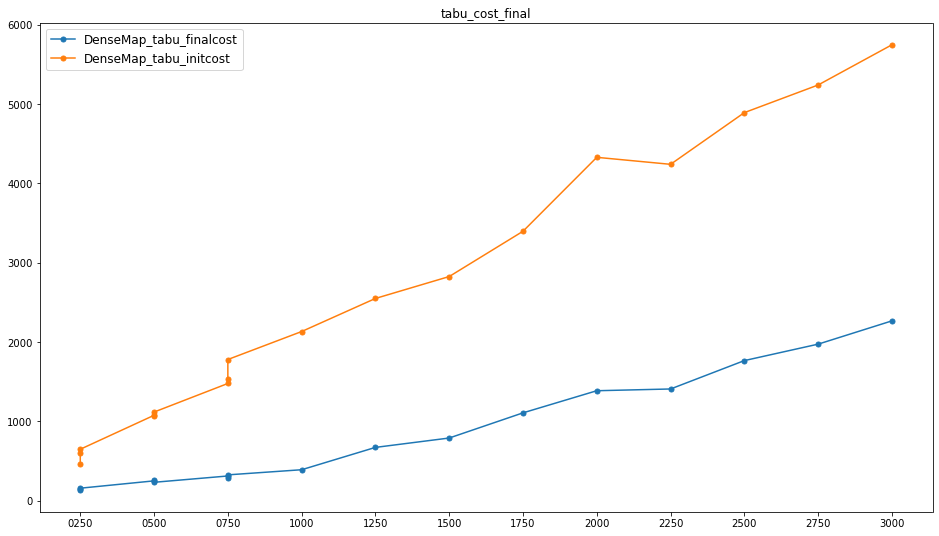

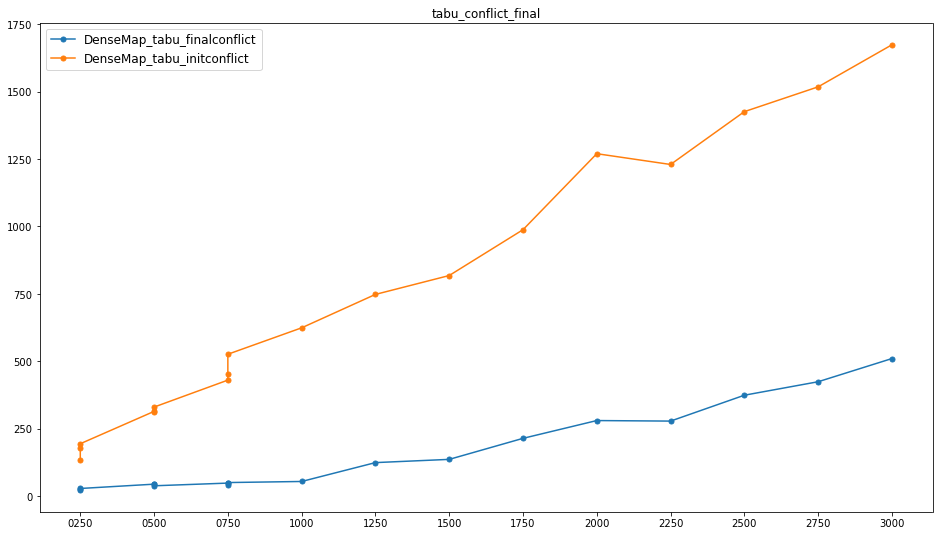

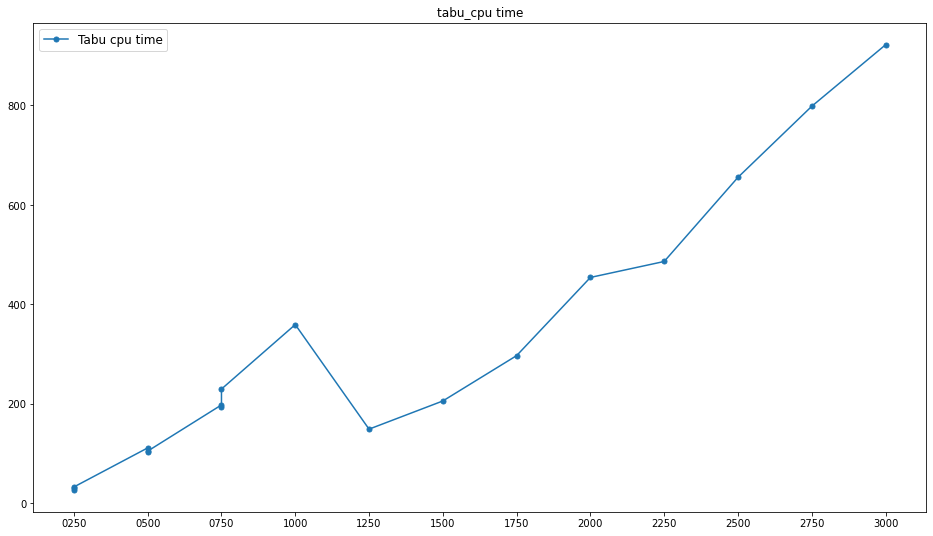

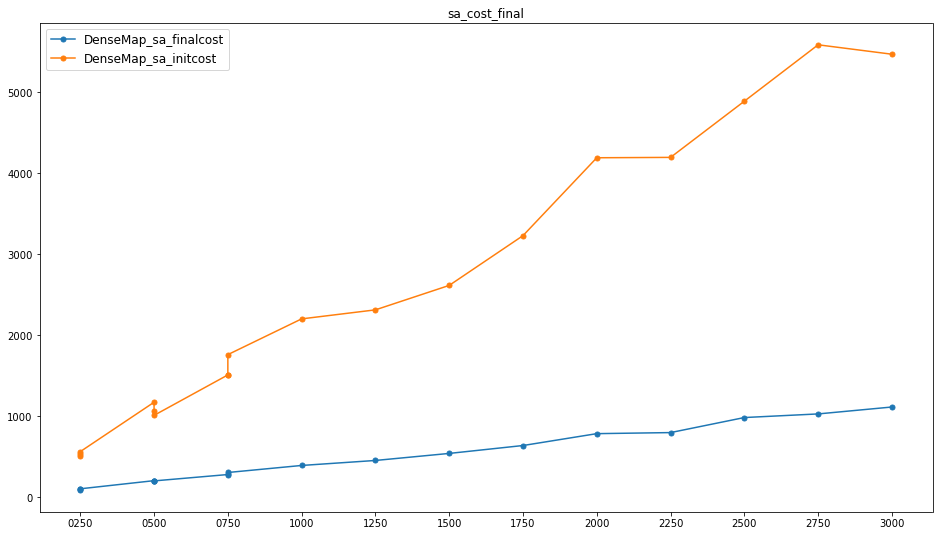

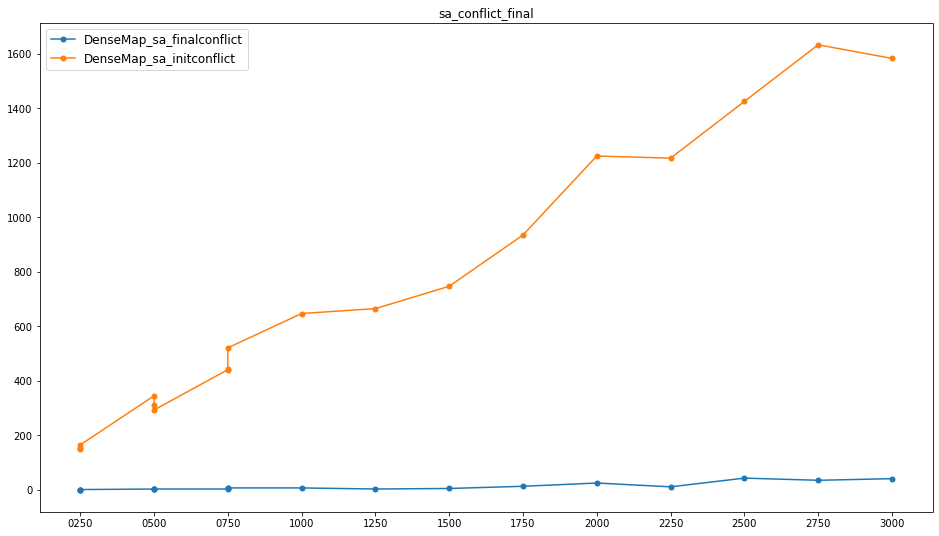

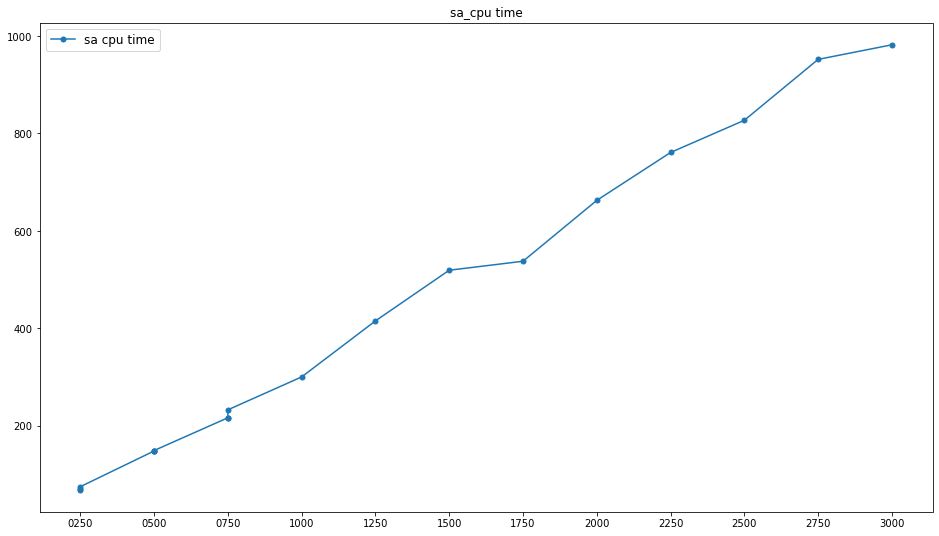

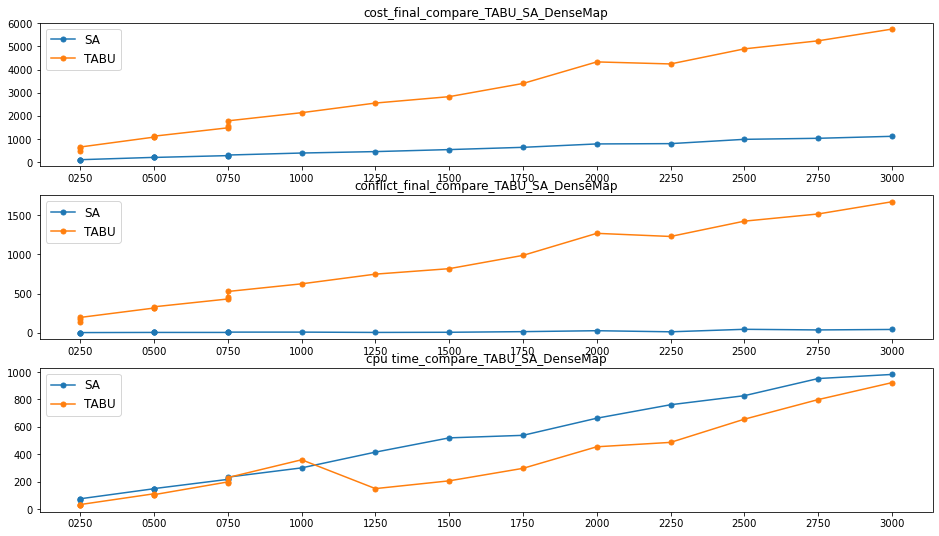

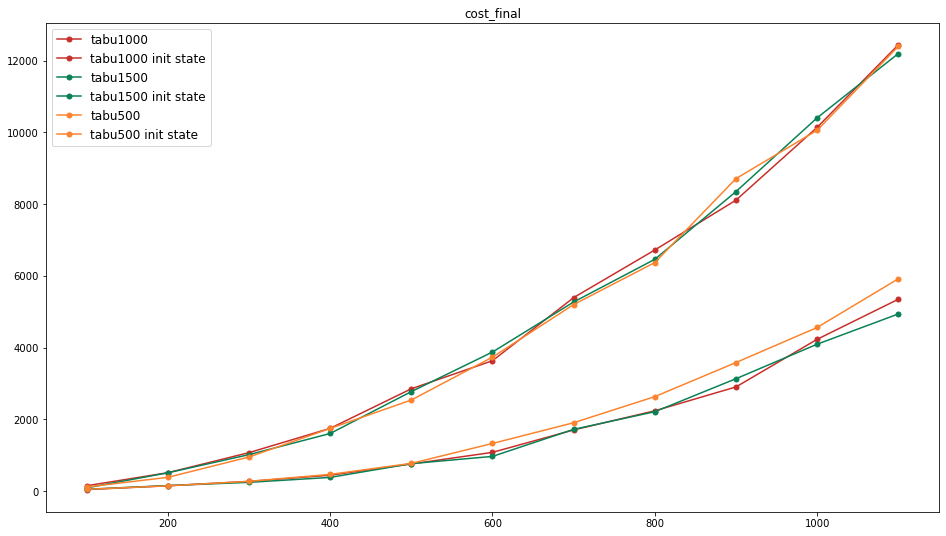

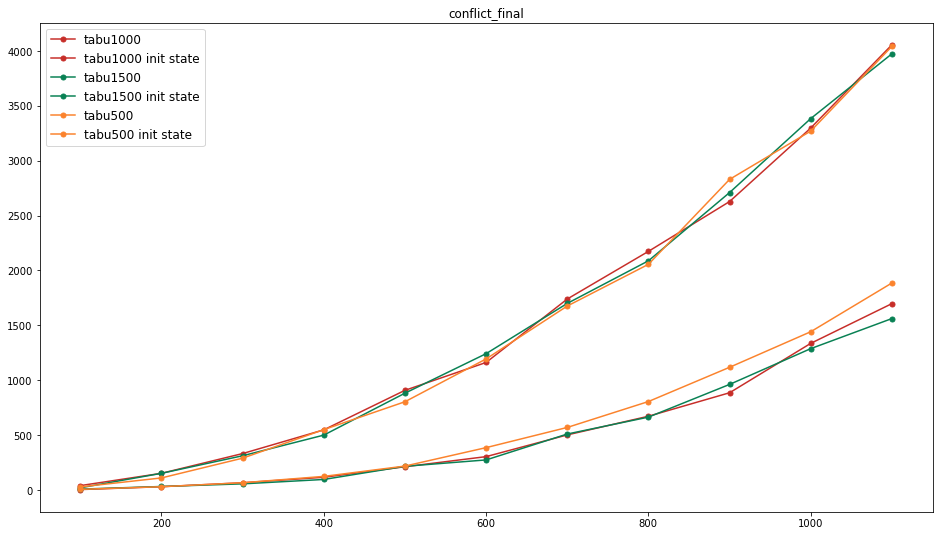

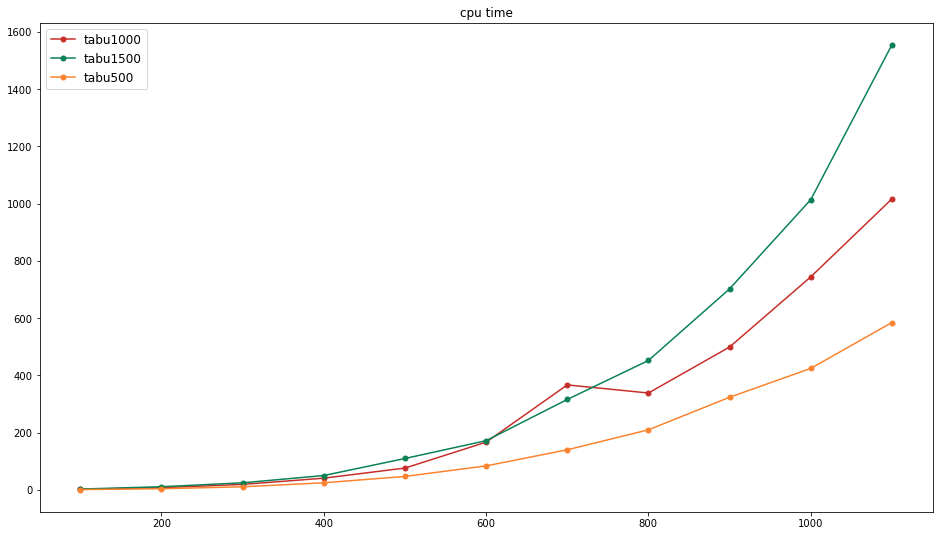

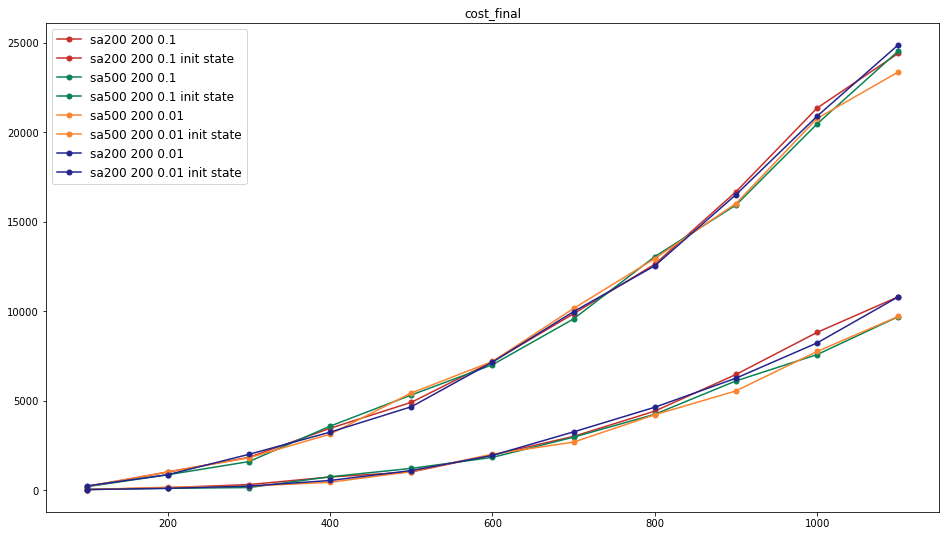

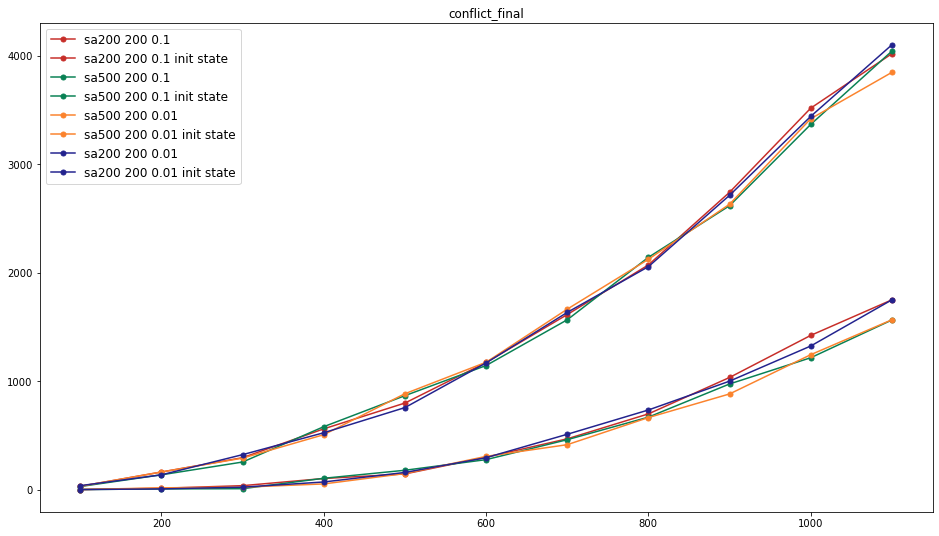

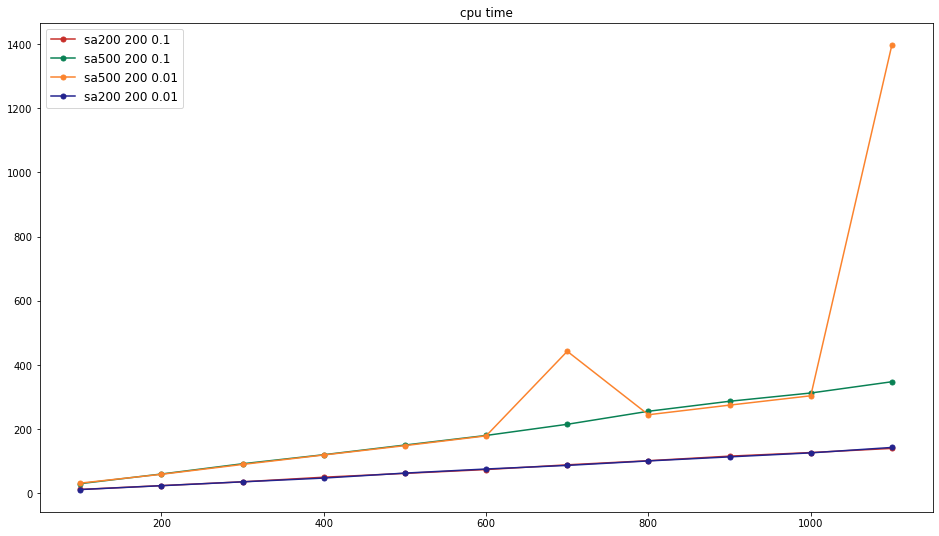

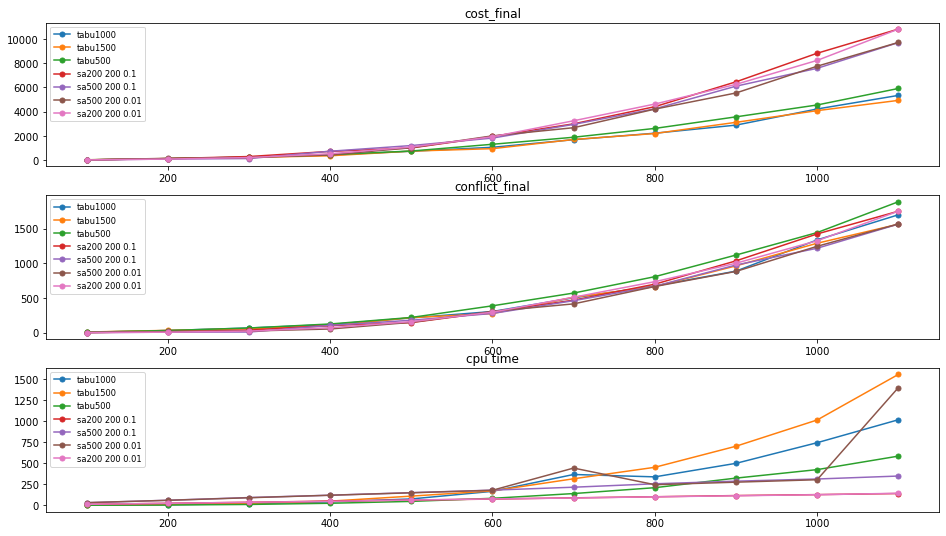

In [36]:
"""
DenseMap Tabu
"""
fig1 = plt.figure(figsize=(pltx,plty))
plt.title("{}".format("tabu_cost_final"))
plt.plot(tabu_x, tabu_cost_final, label = "DenseMap_tabu_finalcost", marker = 'o', ms = 5)
plt.plot(tabu_x, tabu_cost_init, marker = 'o', label = "DenseMap_tabu_initcost", ms = 5)
plt.legend(loc='upper left', frameon=True, fontsize="large")
plt.savefig("./plotresult/DenseMap_tabu_cost.svg", format="svg")
# plt.show()

fig2 = plt.figure(figsize=(pltx,plty))
plt.title("{}".format("tabu_conflict_final"))
plt.plot(tabu_x, tabu_conflict_final,label = "DenseMap_tabu_finalconflict", marker = 'o', ms = 5)
plt.plot(tabu_x, tabu_conflict_init,label = "DenseMap_tabu_initconflict", marker = 'o', ms = 5)
plt.legend(loc='upper left', frameon=True, fontsize="large")
plt.savefig("./plotresult/DenseMap_tabu_conflict.svg", format="svg")

fig2 = plt.figure(figsize=(pltx,plty))
plt.title("{}".format("tabu_cpu time"))
plt.plot(tabu_x, tabu_timespan, marker = 'o',label = "Tabu cpu time", ms = 5)
plt.legend(loc='upper left', frameon=True, fontsize="large")
plt.savefig("./plotresult/DenseMap_tabu_cpu time.svg", format="svg")
# plt.plot(x, conflict_init, marker = 'o', ms = 5)
# plt.grid()
# plt.savefig(("./test.svg"), format="svg")
# plt.show()

"""
DenseMap SA
"""
fig1 = plt.figure(figsize=(pltx,plty))
plt.title("{}".format("sa_cost_final"))
plt.plot(sa_x, sa_cost_final,label = "DenseMap_sa_finalcost", marker = 'o', ms = 5)
plt.plot(sa_x, sa_cost_init, label = "DenseMap_sa_initcost",marker = 'o', ms = 5)
plt.legend(loc='upper left', frameon=True, fontsize="large")
plt.savefig("./plotresult/DenseMap_sa_cost.svg", format="svg")
# plt.show()

fig2 = plt.figure(figsize=(pltx,plty))
plt.title("{}".format("sa_conflict_final"))
plt.plot(sa_x, sa_conflict_final, label = "DenseMap_sa_finalconflict", marker = 'o', ms = 5)
plt.plot(sa_x, sa_conflict_init, label = "DenseMap_sa_initconflict", marker = 'o', ms = 5)
plt.legend(loc='upper left', frameon=True, fontsize="large")
plt.savefig("./plotresult/DenseMap_sa_conflict.svg", format="svg")

fig2 = plt.figure(figsize=(pltx,plty))
plt.title("{}".format("sa_cpu time"))
plt.plot(sa_x, sa_timespan, marker = 'o',label = "sa cpu time", ms = 5)
plt.legend(loc='upper left', frameon=True, fontsize="large")
plt.savefig("./plotresult/DenseMap_sa_cpu time.svg", format="svg")
# plt.plot(x, conflict_init, marker = 'o', ms = 5)
# plt.grid()
# plt.savefig(("./test.svg"), format="svg")
# plt.show()

"""
DenseMap Compare
"""
plt.figure(figsize=(pltx,plty))
plt.subplot(311)
plt.title("{}".format("cost_final_compare_TABU_SA_DenseMap"))
plt.plot(sa_x, sa_cost_final, label="SA", marker = 'o', ms = 5)
plt.plot(sa_x, tabu_cost_init, label="TABU", marker = 'o', ms = 5)
plt.legend(loc='upper left', frameon=True, fontsize="large")
# plt.show()

plt.subplot(312)
# fig2 = plt.figure(figsize=(pltx,plty))
plt.title("{}".format("conflict_final_compare_TABU_SA_DenseMap"))
plt.plot(sa_x, sa_conflict_final, label="SA", marker = 'o', ms = 5)
plt.plot(sa_x, tabu_conflict_init, label="TABU", marker = 'o', ms = 5)
plt.legend(loc='upper left', frameon=True, fontsize="large")
# plt.show()
# fig2 = plt.figure(figsize=(pltx,plty))
plt.subplot(313)
plt.title("{}".format("cpu time_compare_TABU_SA_DenseMap"))
plt.plot(sa_x, sa_timespan, label="SA", marker = 'o', ms = 5)
plt.plot(sa_x, tabu_timespan, label="TABU", marker = 'o', ms = 5)
# plt.plot(x, conflict_init, marker = 'o', ms = 5)
# plt.grid()
# plt.savefig(("./test.svg"), format="svg")
plt.legend(loc='upper left', frameon=True, fontsize="large")
plt.savefig("./plotresult/DenseMap_compare.svg", format="svg")
# plt.show()

"""
US cities tabu
"""
fig1 = plt.figure(figsize=(pltx,plty))
plt.title("{}".format("cost_final"))
colors =['#c72e29','#098154','#fb832d', '#23238e']#4种不同颜色
i = 0
for key in dicttabu:
    plt.plot(x, dicttabu[key]['cost_final'],label = key,c=colors[i], marker = 'o', ms = 5)
    plt.plot(x, dicttabu[key]['cost_init'],label = key+" init state",c=colors[i], marker = 'o', ms = 5)
    i = i+1
plt.legend(loc='upper left', frameon=True, fontsize="large")
plt.savefig("./plotresult/US cities_tabu_cost.svg", format="svg")
# plt.show()

fig2 = plt.figure(figsize=(pltx,plty))
plt.title("{}".format("conflict_final"))
i = 0
for key in dicttabu:
    plt.plot(x, dicttabu[key]['conflict_final'], label = key, c=colors[i], marker = 'o', ms = 5)
    plt.plot(x, dicttabu[key]['conflict_init'], label = key+" init state", c=colors[i], marker = 'o', ms = 5)
    i = i + 1
plt.legend(loc='upper left', frameon=True, fontsize="large")
plt.savefig("./plotresult/US cities_tabu_conflict.svg", format="svg")
# plt.show()

fig2 = plt.figure(figsize=(pltx,plty))
plt.title("{}".format("cpu time"))
i = 0
for key in dicttabu:
    plt.plot(x, dicttabu[key]['timespan'], label = key, c=colors[i], marker = 'o', ms = 5)
    i = i + 1
plt.legend(loc='upper left', frameon=True, fontsize="large")
plt.savefig("./plotresult/US cities_tabu_time span.svg", format="svg")
# plt.show()

"""
US cities sa
"""      
fig1 = plt.figure(figsize=(pltx,plty))
plt.title("{}".format("cost_final"))
i = 0
for key in dictsa:
    plt.plot(x, dictsa[key]['cost_final'],label = key,c=colors[i], marker = 'o', ms = 5)
    plt.plot(x, dictsa[key]['cost_init'],label = key+" init state",c=colors[i], marker = 'o', ms = 5)
    i = i+1
plt.legend(loc='upper left', frameon=True, fontsize="large")
plt.savefig("./plotresult/US cities_sa_cost.svg", format="svg")
# plt.show()

fig2 = plt.figure(figsize=(pltx,plty))
plt.title("{}".format("conflict_final"))
i = 0
for key in dictsa:
    plt.plot(x, dictsa[key]['conflict_final'], label = key, c=colors[i], marker = 'o', ms = 5)
    plt.plot(x, dictsa[key]['conflict_init'], label = key+" init state", c=colors[i], marker = 'o', ms = 5)
    i = i + 1
plt.legend(loc='upper left', frameon=True, fontsize="large")
plt.savefig("./plotresult/US cities_sa_conflict.svg", format="svg")
# plt.show()

fig2 = plt.figure(figsize=(pltx,plty))
plt.title("{}".format("cpu time"))
i = 0
for key in dictsa:
    plt.plot(x, dictsa[key]['timespan'], label = key, c=colors[i], marker = 'o', ms = 5)
    i = i + 1
plt.legend(loc='upper left', frameon=True, fontsize="large")
plt.savefig("./plotresult/US cities_sa_time span.svg", format="svg")
# plt.show()

"""
US cities compare
"""
plt.figure(figsize=(pltx,plty))
plt.subplot(311)
plt.title("{}".format("cost_final"))
for key in dicttabu:
    plt.plot(x, dicttabu[key]['cost_final'], label = key,marker = 'o', ms = 5)
    # plt.plot(x, dicttabu[key]['cost_init'], marker = 'o', ms = 5)
for key in dictsa:
    plt.plot(x, dictsa[key]['cost_final'], label = key, marker = 'o', ms = 5)
    # plt.plot(x, dictsa[key]['cost_init'], marker = 'o', ms = 5)
plt.legend(loc='upper left', frameon=True, fontsize="small")
plt.savefig("./plotresult/US cities_tabu_conflict.svg", format="svg")
# plt.savefig("./test1.svg", format="svg")
# plt.show()

# fig2 = plt.figure(figsize=(pltx,plty))
plt.subplot(312)
plt.title("{}".format("conflict_final"))
for key in dicttabu:
    plt.plot(x, dicttabu[key]['conflict_final'],label = key, marker = 'o', ms = 5)
    # plt.plot(x, dicttabu[key]['conflict_init'],label = key, marker = 'o', ms = 5)
for key in dictsa:
    plt.plot(x, dictsa[key]['conflict_final'],label = key, marker = 'o', ms = 5)
    # plt.plot(x, dictsa[key]['conflict_init'], marker = 'o', ms = 5)
plt.legend(loc='upper left', frameon=True, fontsize="small")
# plt.show()

# fig2 = plt.figure(figsize=(pltx,plty))
plt.subplot(313)
plt.title("{}".format("cpu time"))
for key in dicttabu:
    plt.plot(x, dicttabu[key]['timespan'],label = key, marker = 'o', ms = 5)
for key in dictsa:
    plt.plot(x, dictsa[key]['timespan'],label = key, marker = 'o', ms = 5)
plt.legend(loc='upper left', frameon=True, fontsize="small")
plt.savefig("./plotresult/US cities_compare.svg", format="svg")
plt.show()
